### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('glass.csv')

### EDA

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


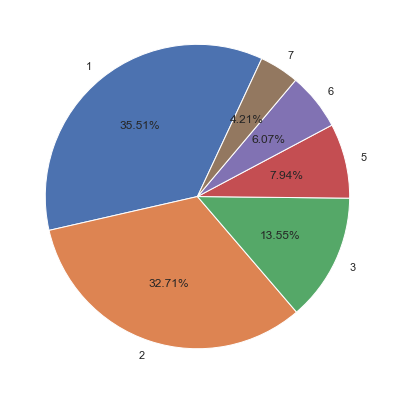

In [6]:
sns.set(rc={'figure.figsize':(10,7)})
labels = list(df.Type.unique())
sizes = list(df.Type.value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=65)
plt.show()

# Data-set is unbalanced.

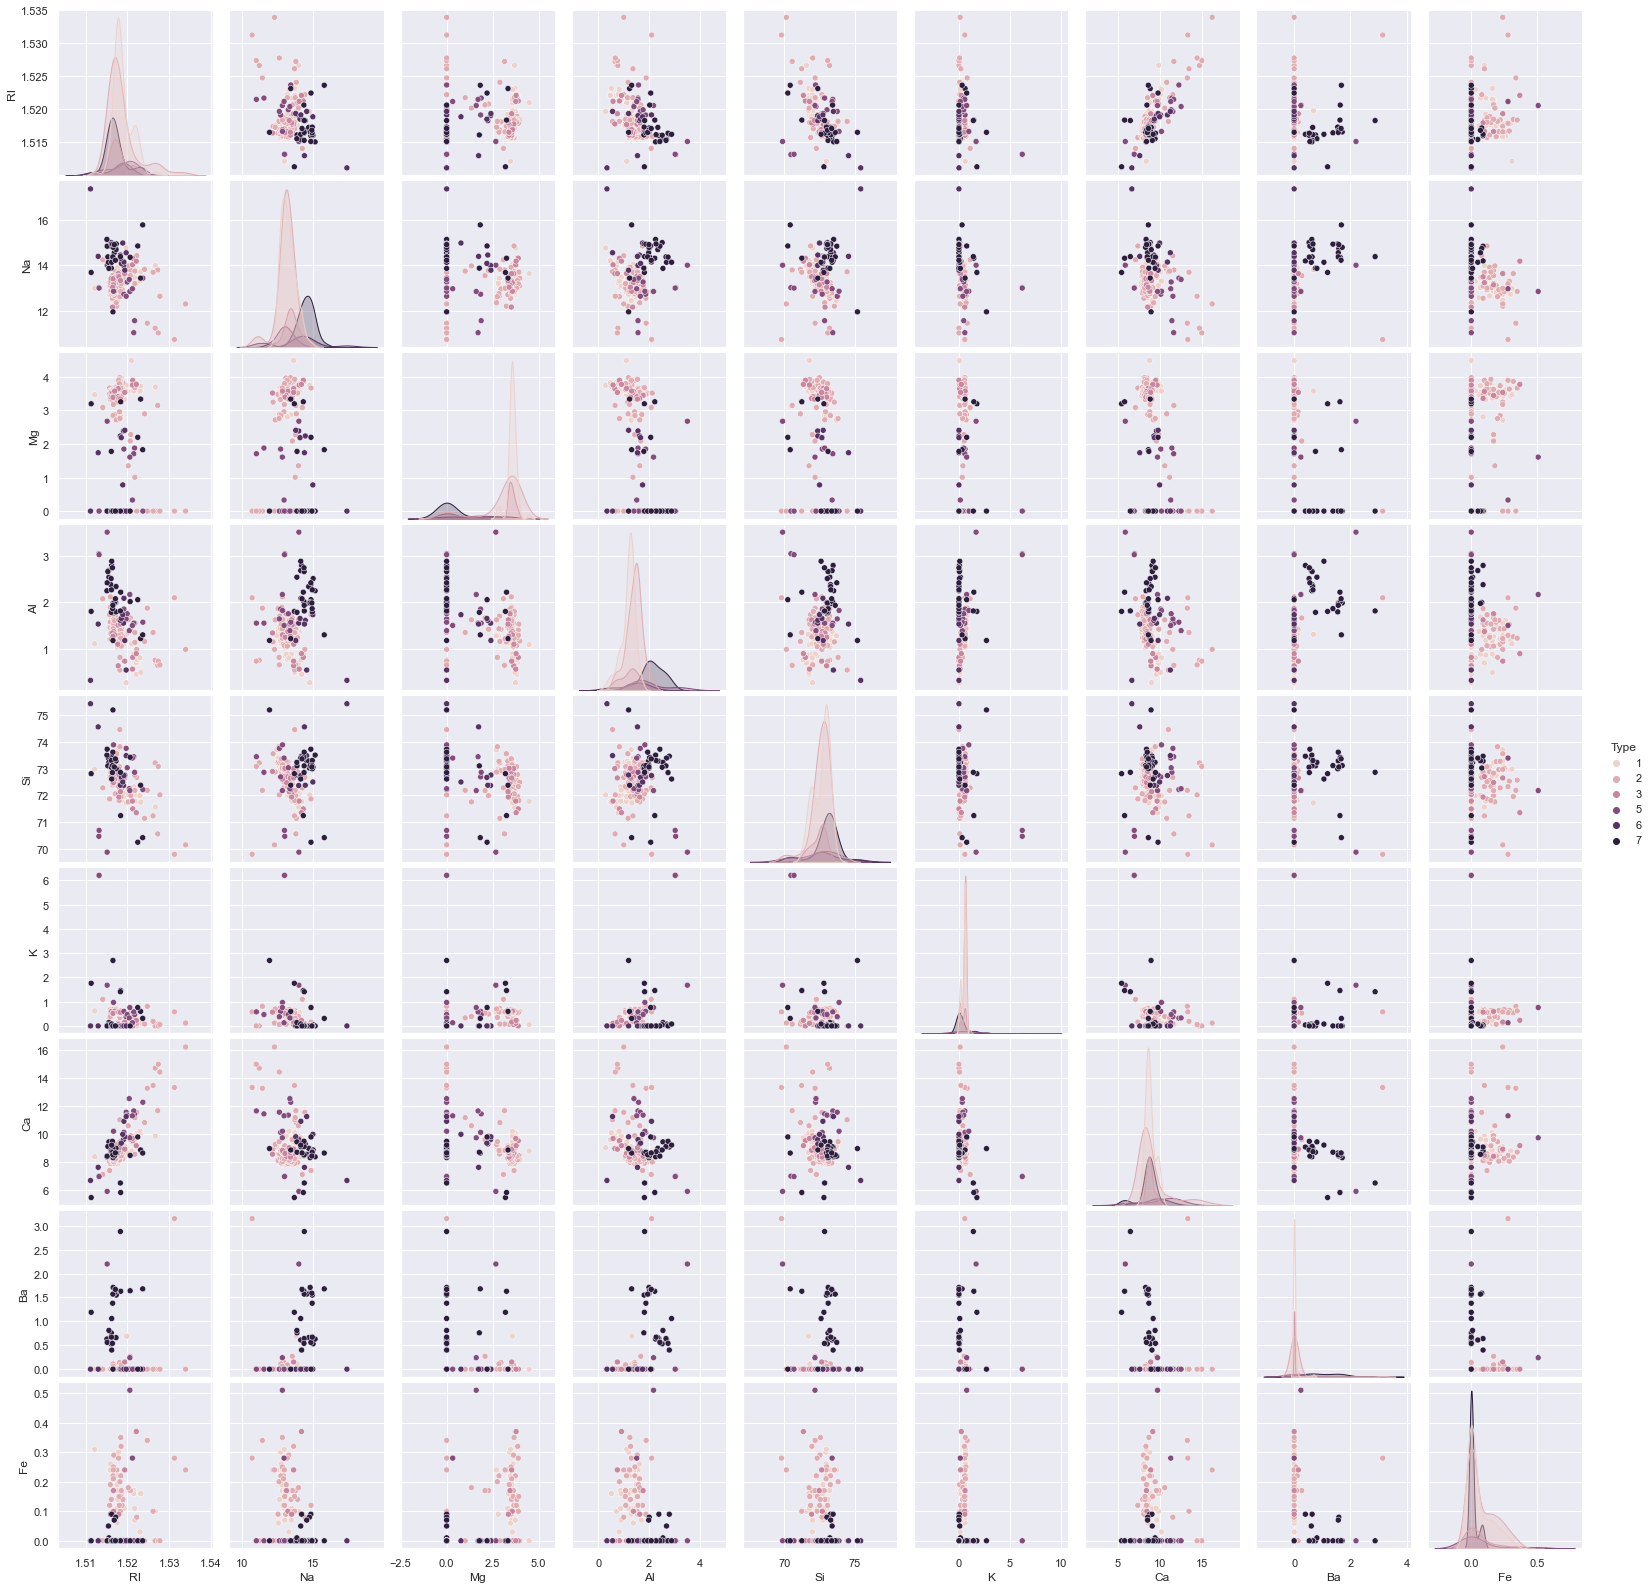

In [7]:
warnings.filterwarnings('ignore')
sns.pairplot(data=df,hue='Type')

### Model building and tuning

In [8]:
X = df.drop(['Type'],axis=1)

In [9]:
y = df["Type"]

In [10]:
knn_model = KNeighborsClassifier()

In [11]:
scaler = StandardScaler()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
n_neighbors = np.array(range(1,25))
param_grid = dict(n_neighbors=n_neighbors)

In [16]:
grid_model = GridSearchCV(estimator=knn_model,param_grid=param_grid,scoring='accuracy',cv=5)

In [17]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

In [18]:
grid_model.best_score_

0.68125

In [19]:
grid_model.best_params_

{'n_neighbors': 1}

### Predictions

In [20]:
y_pred = grid_model.predict(X_test)

### Error metrics

In [21]:
recall_score(y_test,y_pred,labels=df['Type'],average='micro')

0.7468697123519459

In [22]:
precision_score(y_test,y_pred,labels=df['Type'],average='micro')

0.7592019263845889

In [23]:
# Since data-set was imbalanced we prefer recall and precision scores
# Which are in acceptable range.

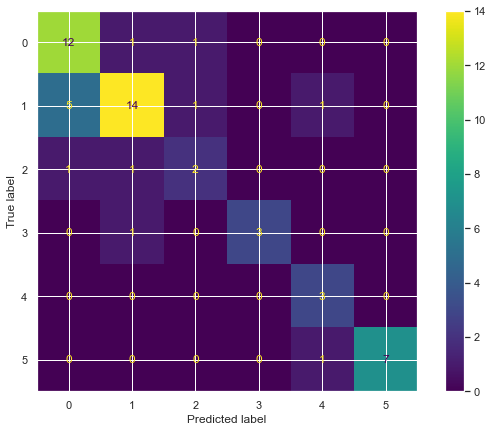

In [24]:
cm = confusion_matrix(y_test,y_pred)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()

### Visualizing the CV results

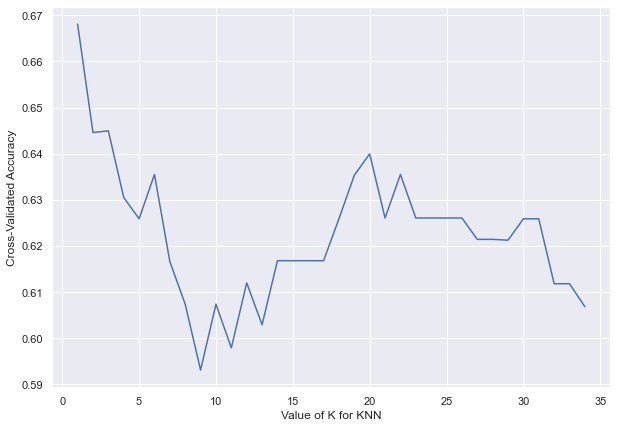

In [25]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score

k_range = range(1, 35)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=8)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()